f:\anacoda3\envs\prompt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


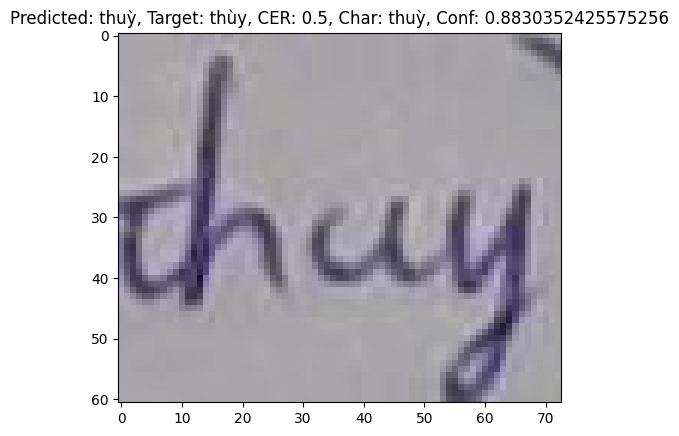

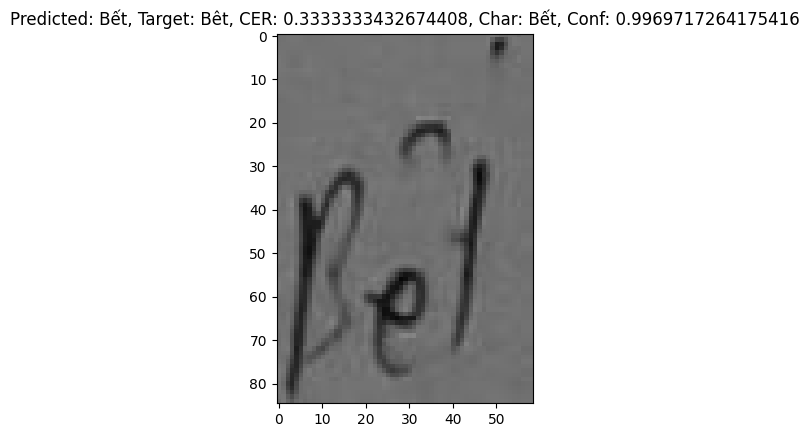

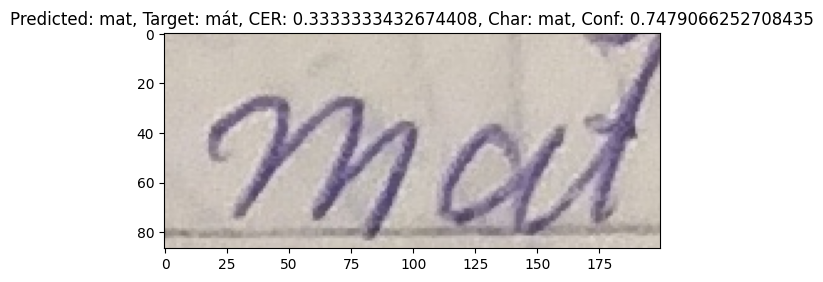

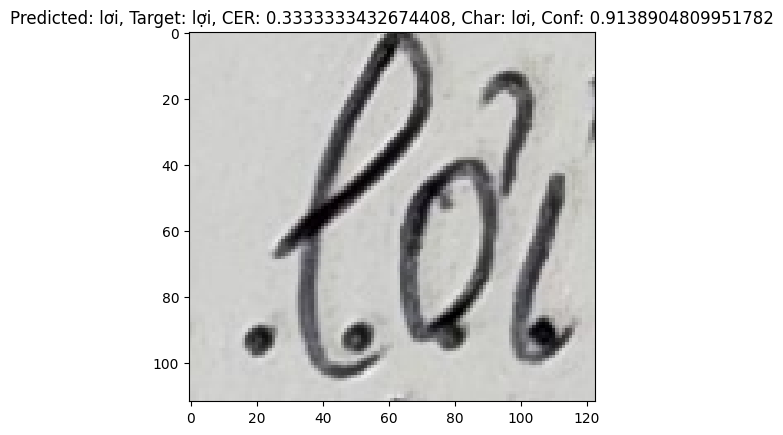

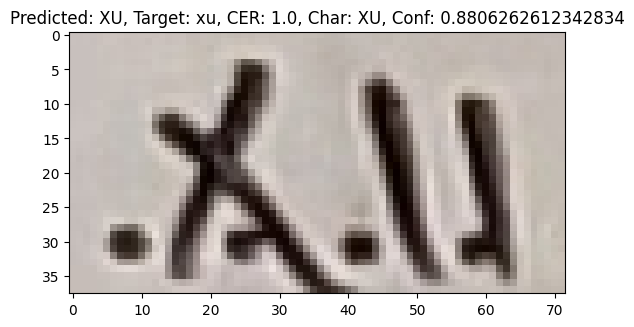

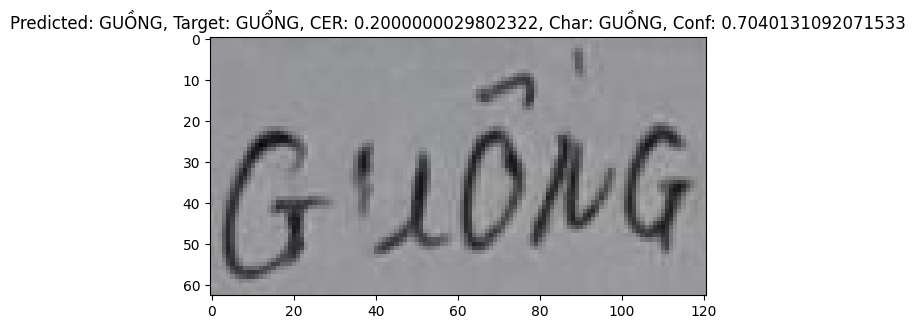

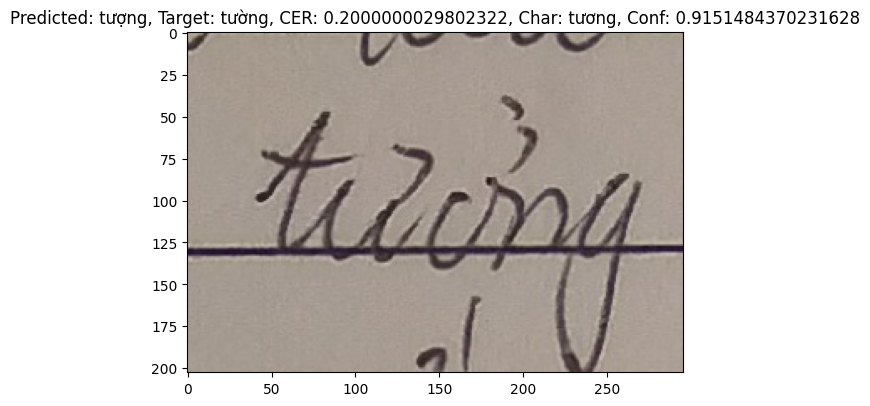

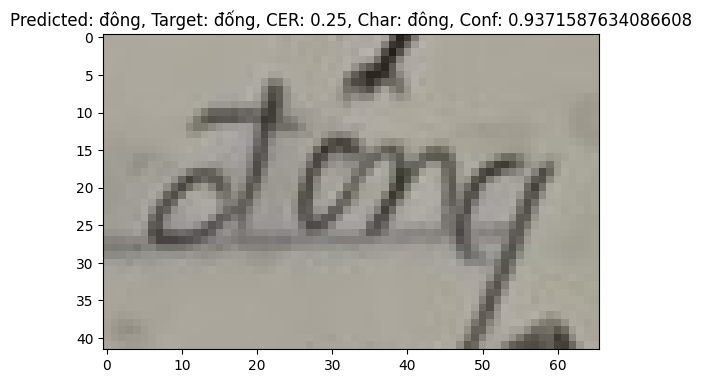

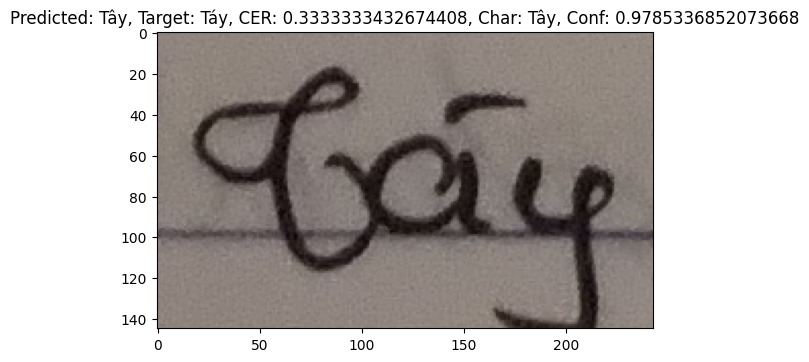

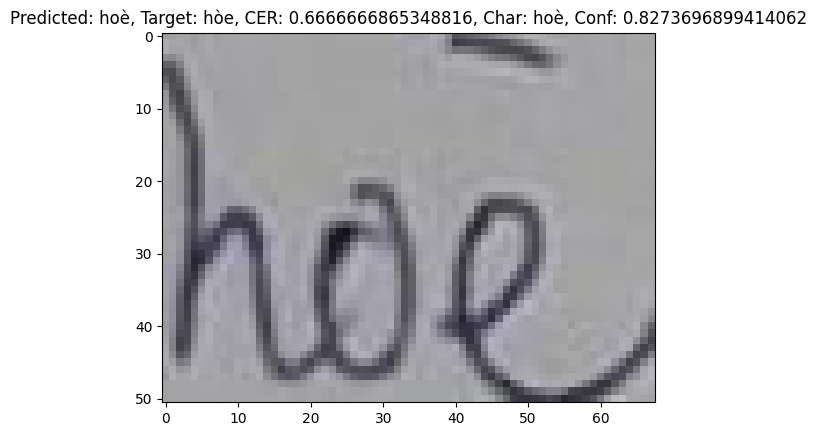

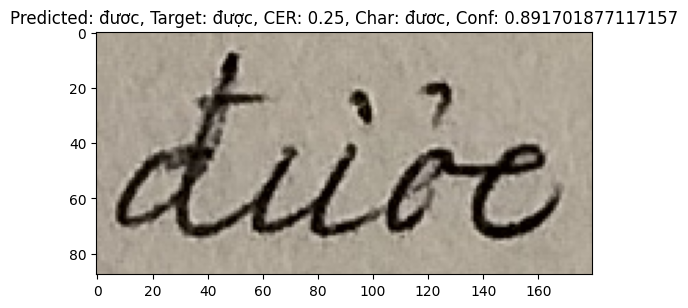

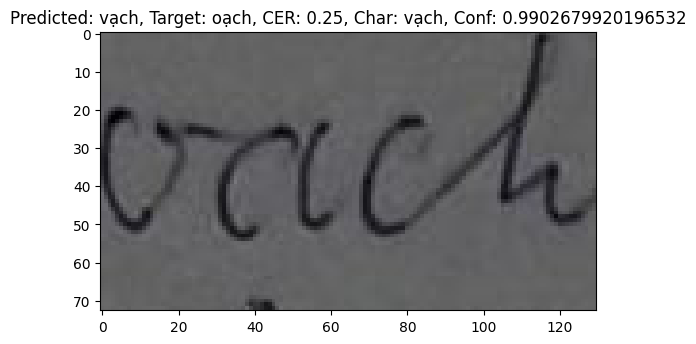

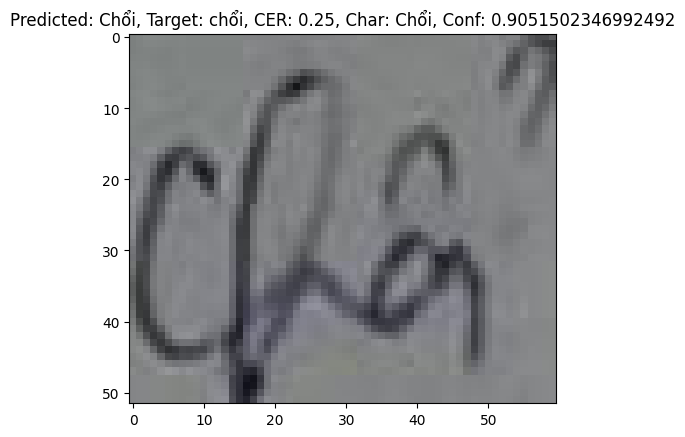

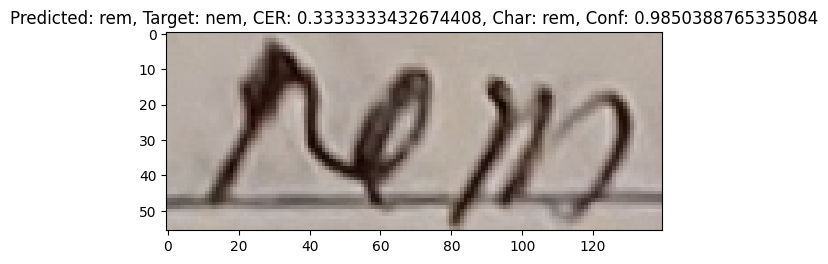

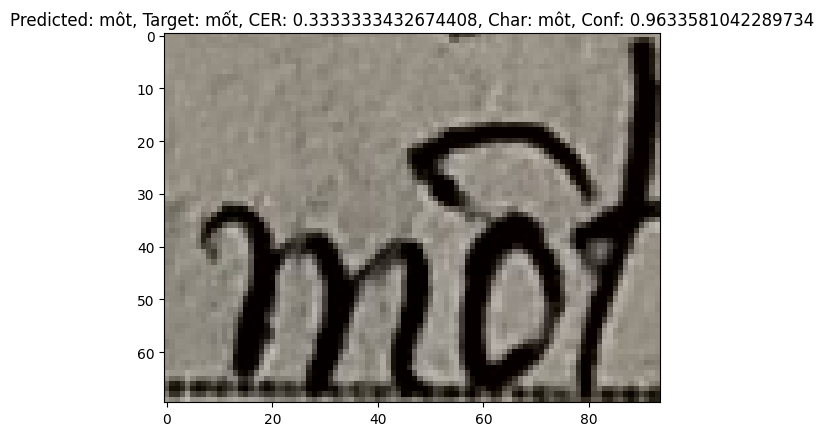

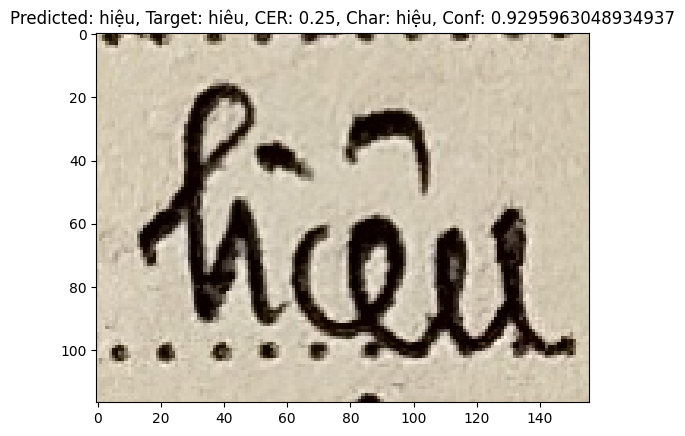

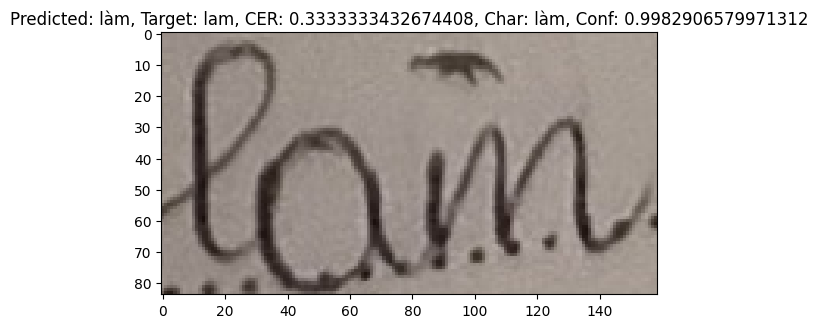

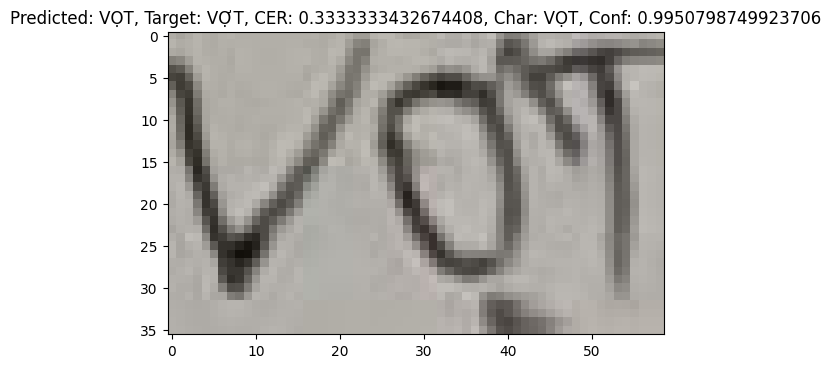

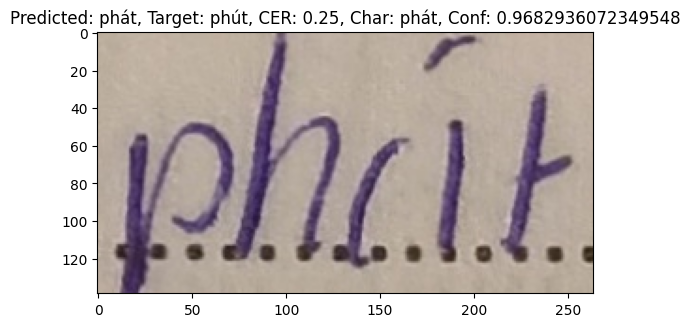

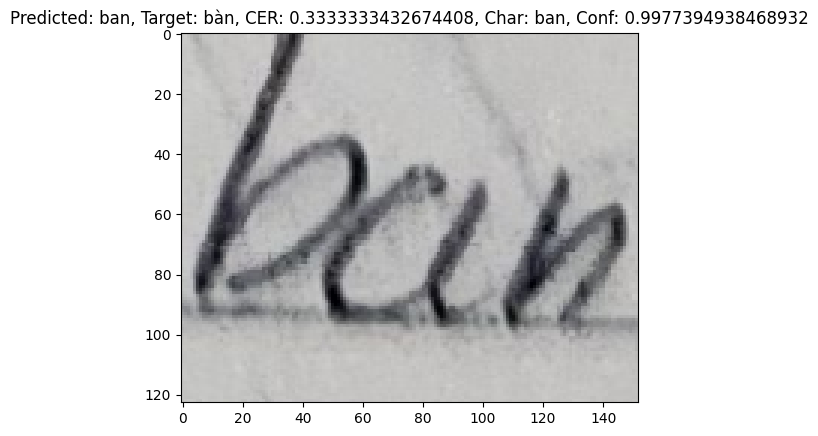

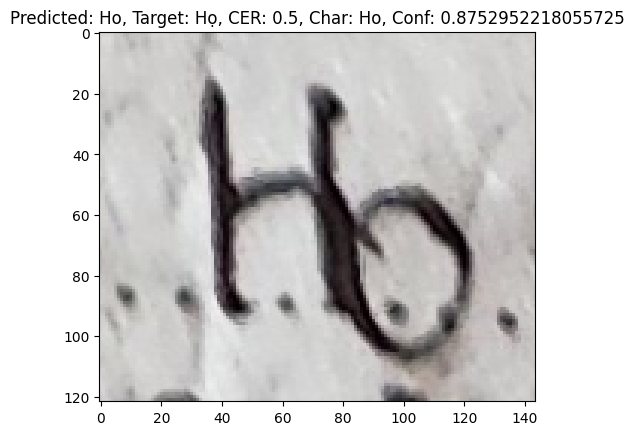

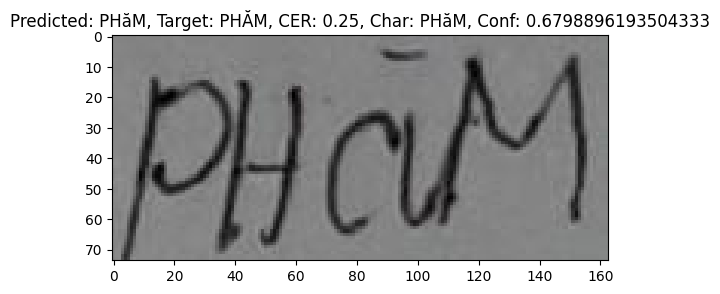

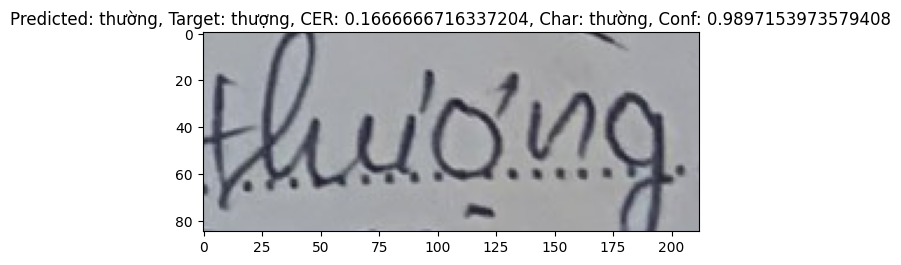

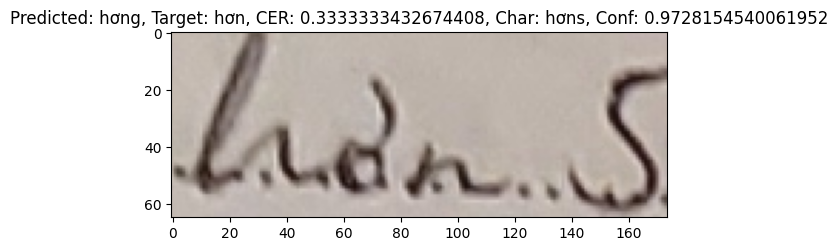

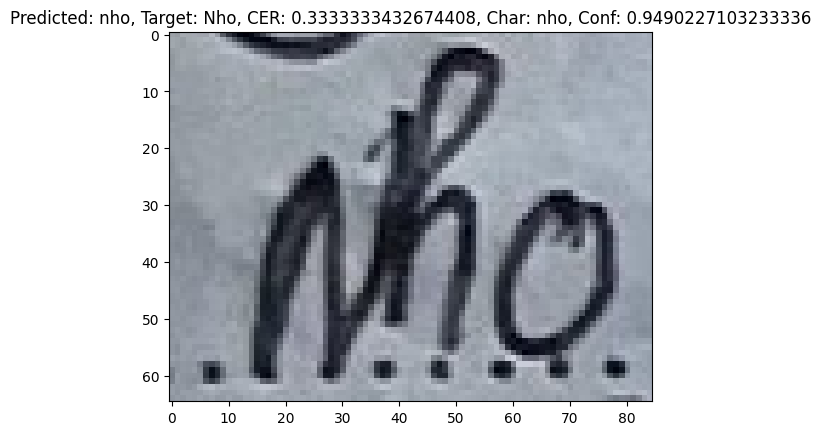

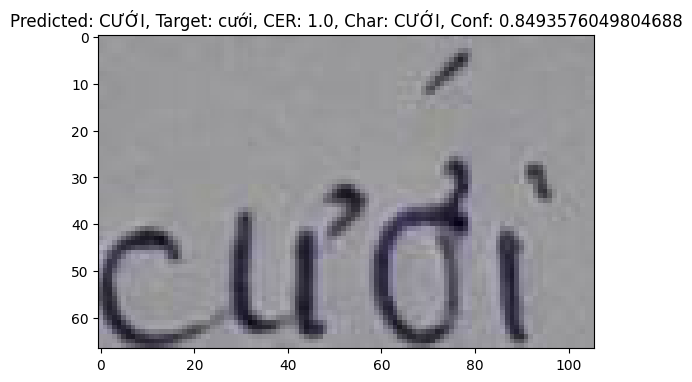

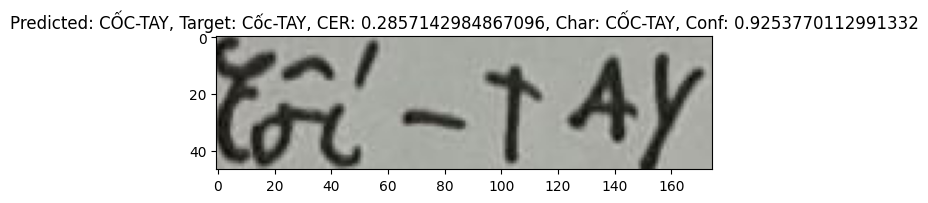

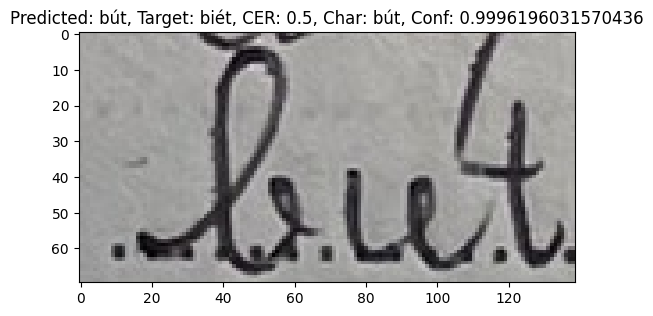

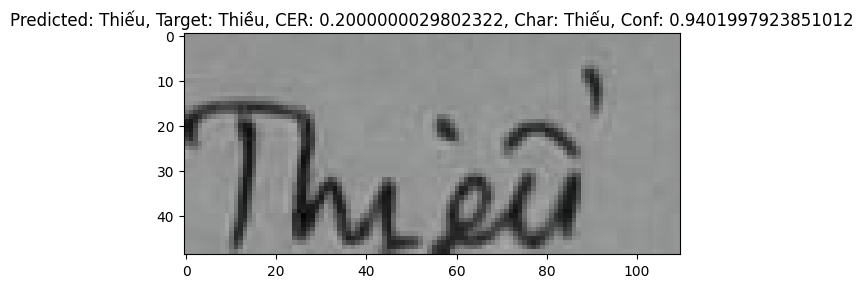

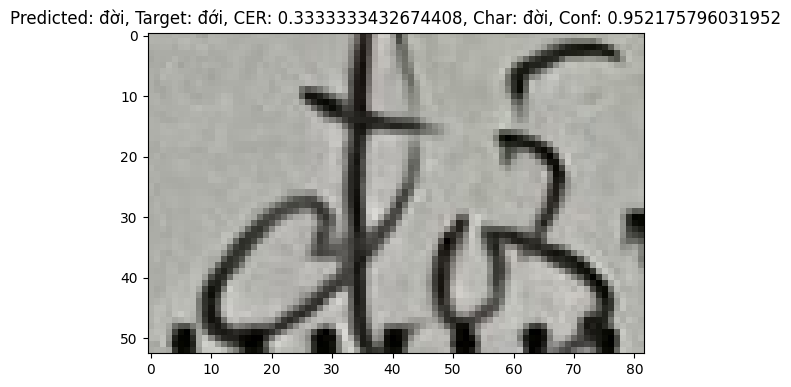

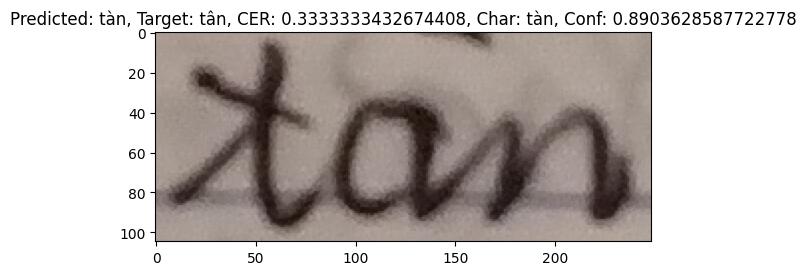

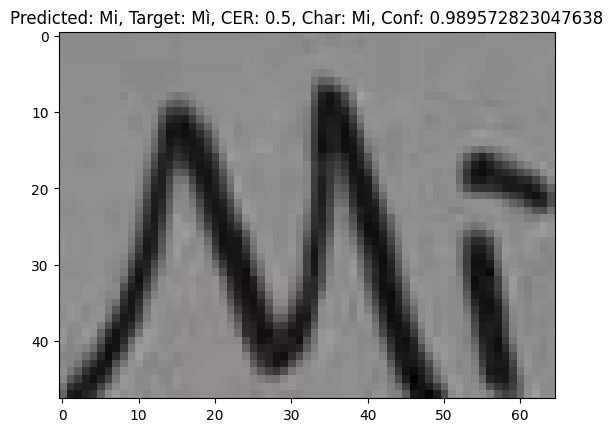

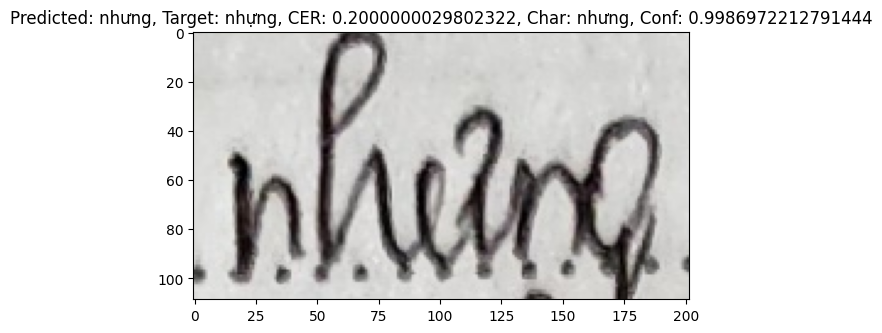

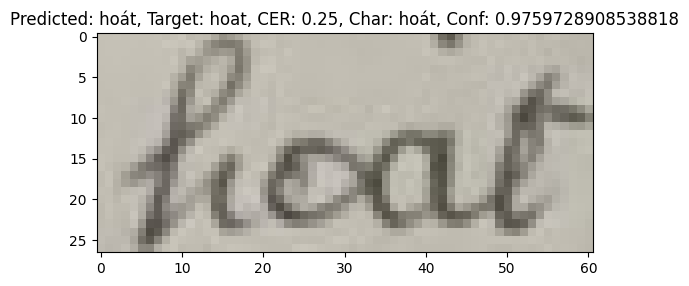

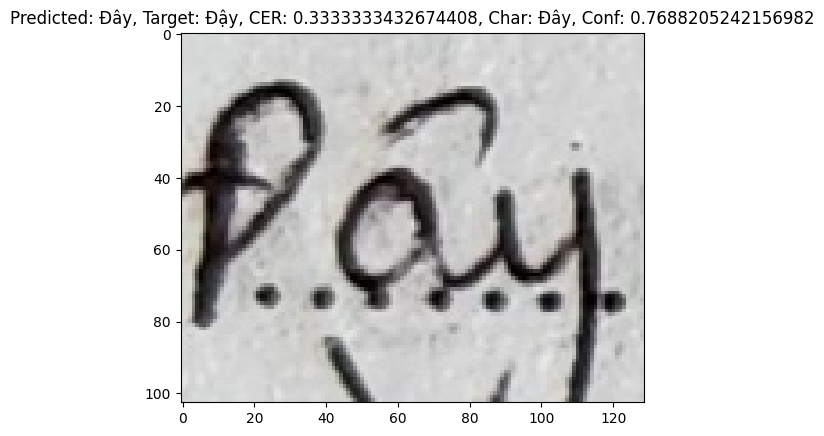

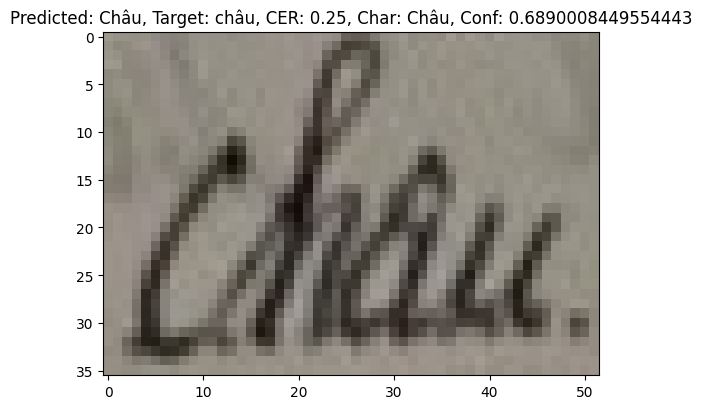

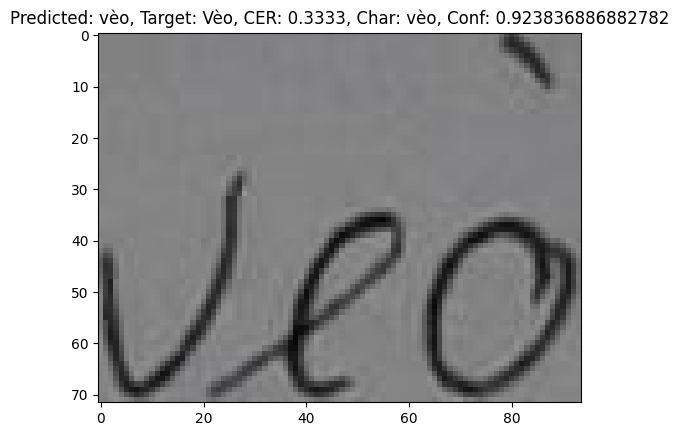

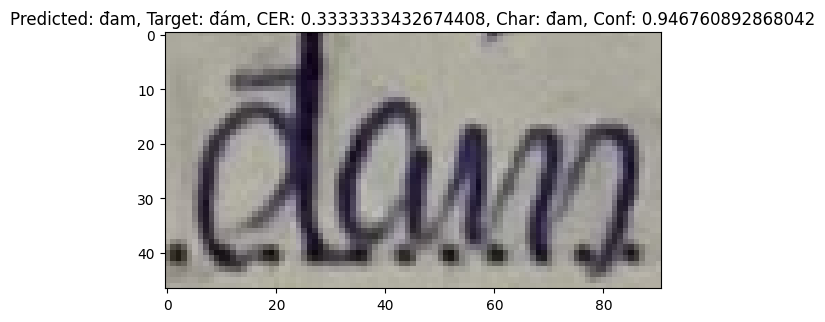

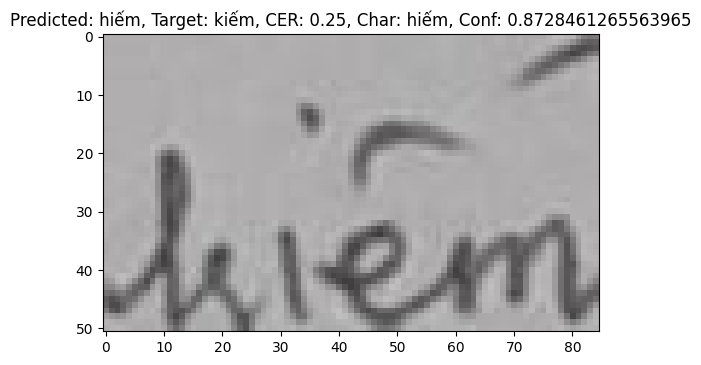

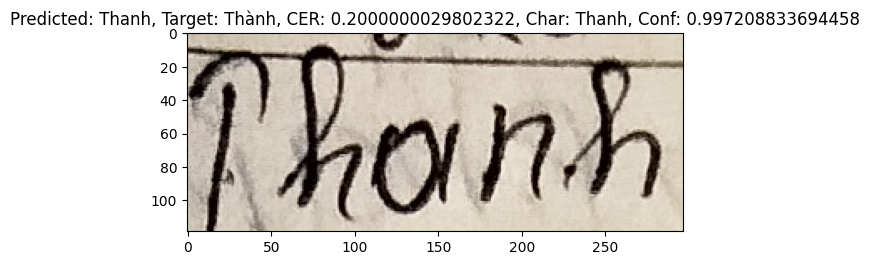

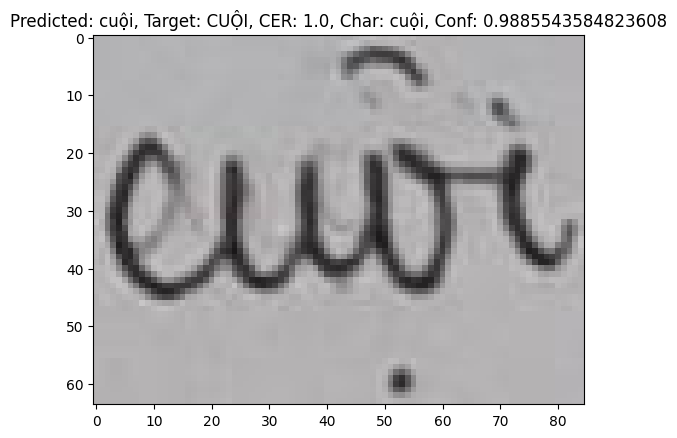

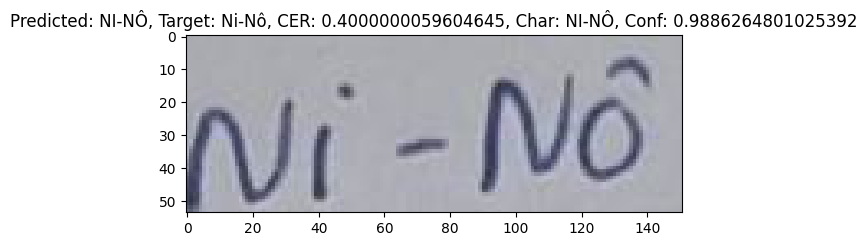

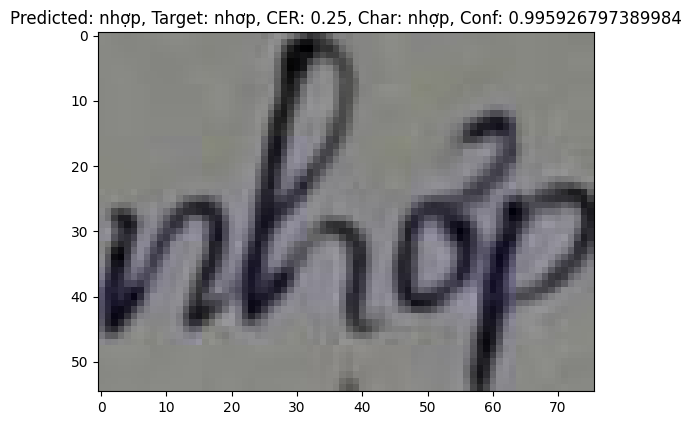

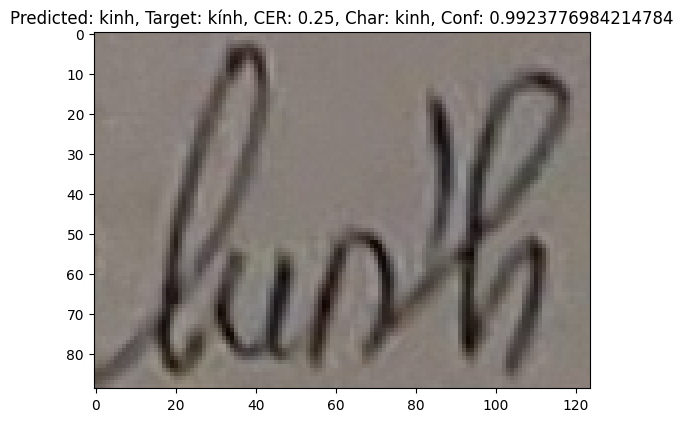

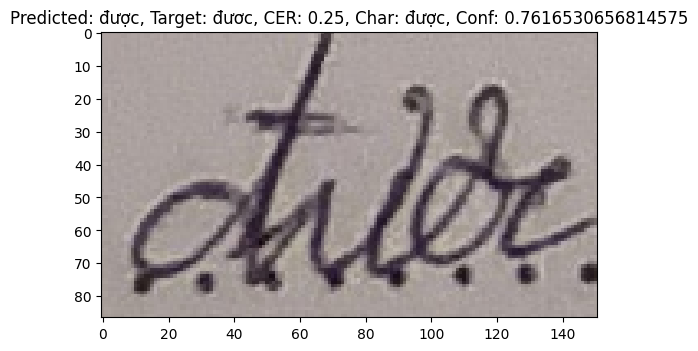

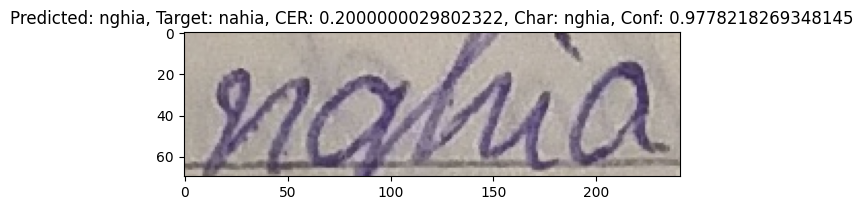

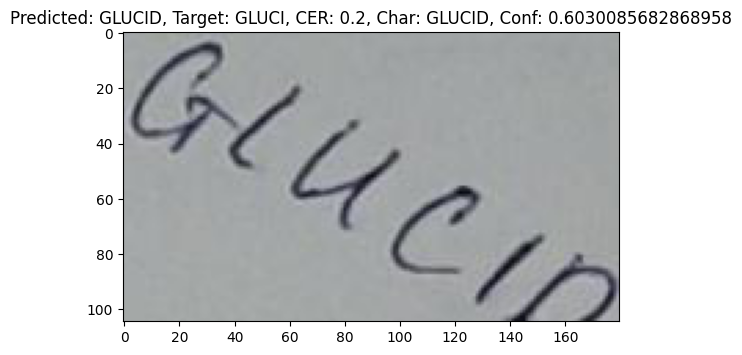

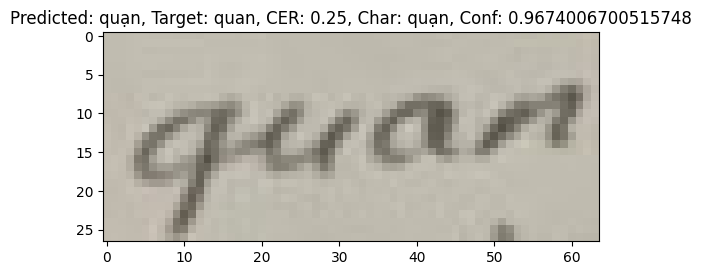

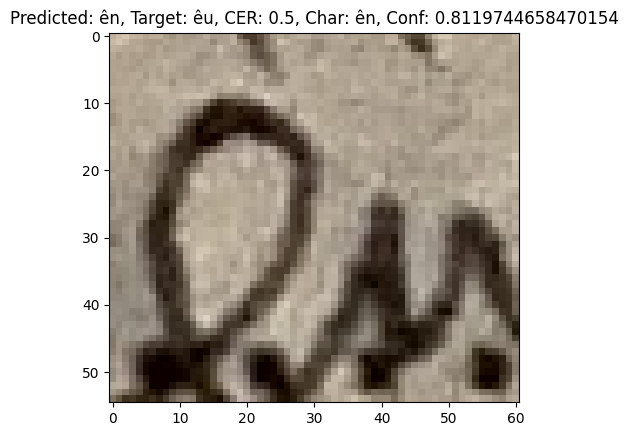

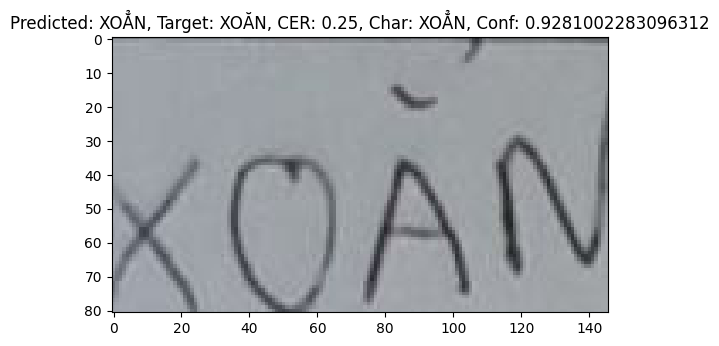

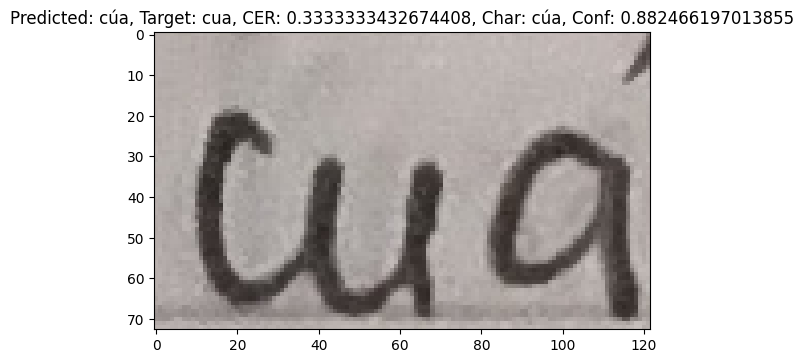

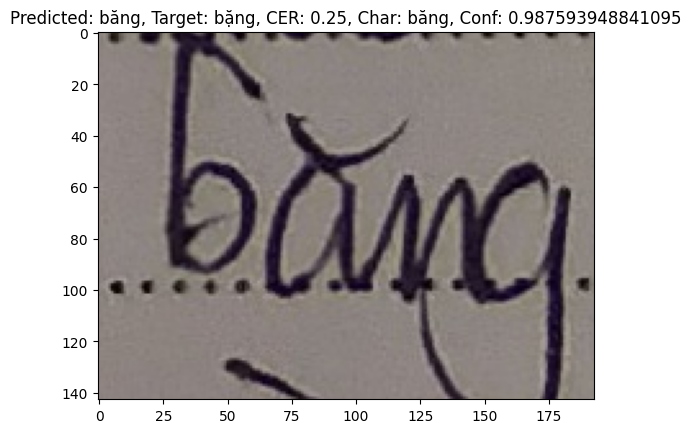

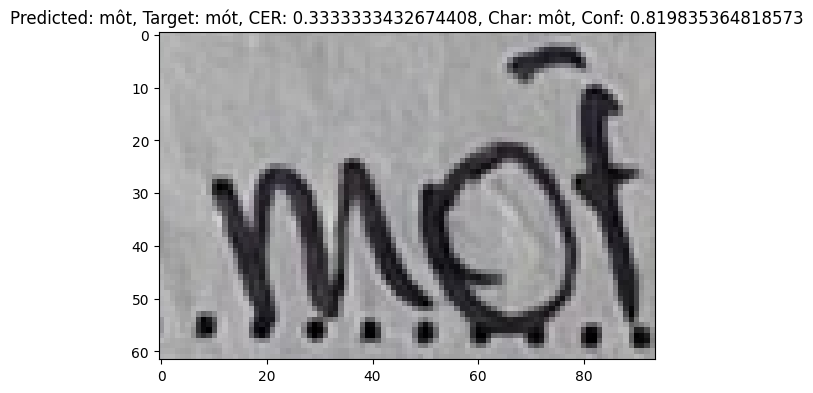

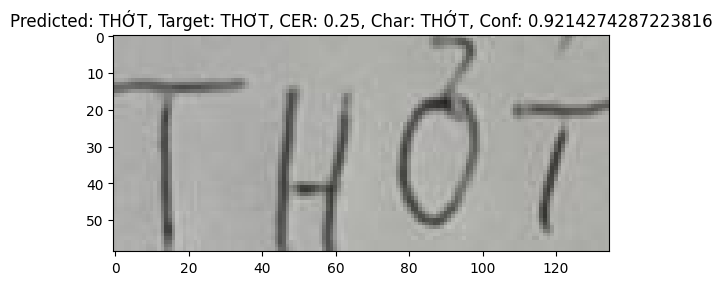

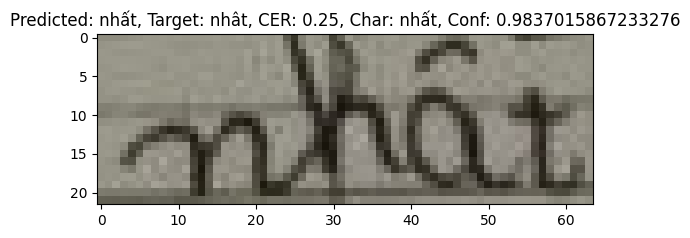

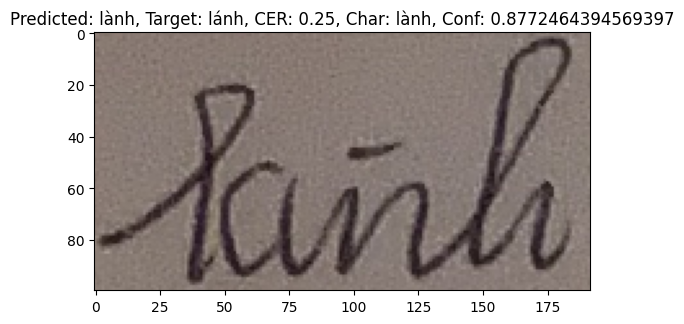

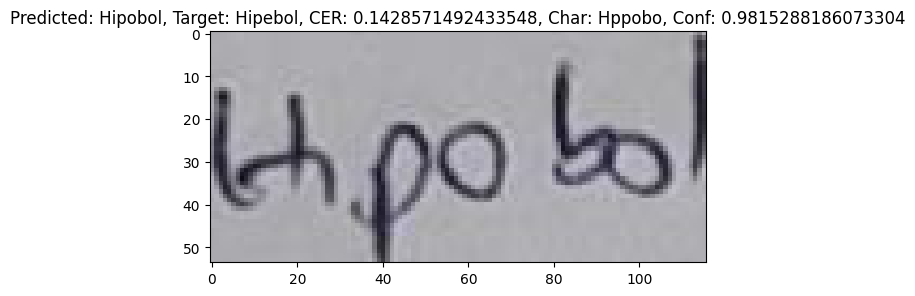

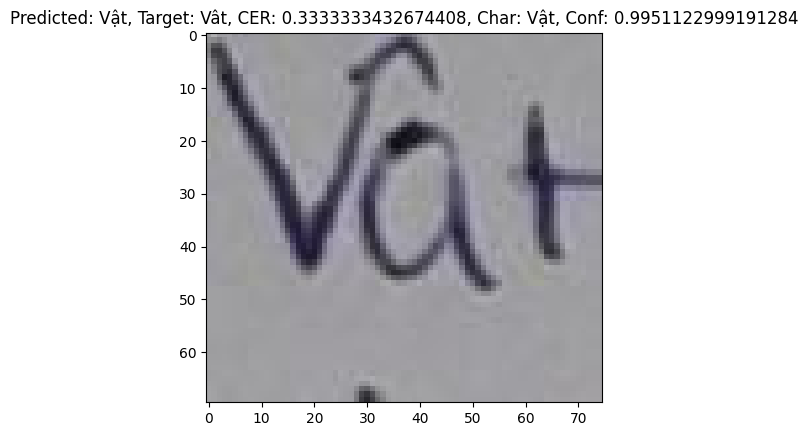

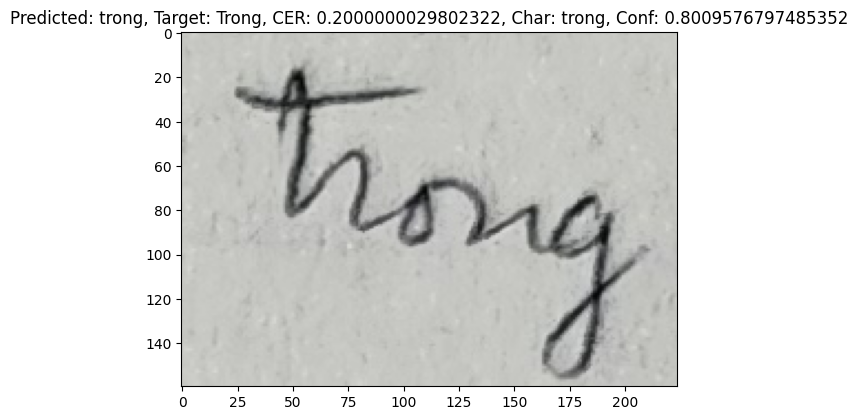

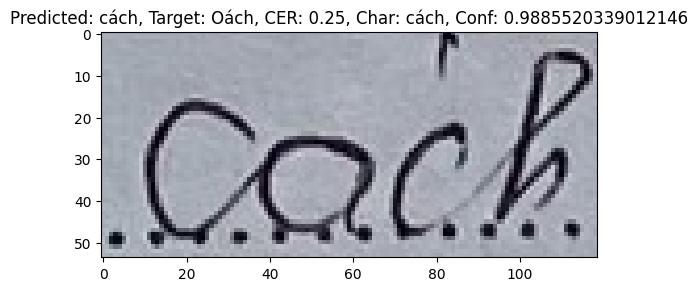

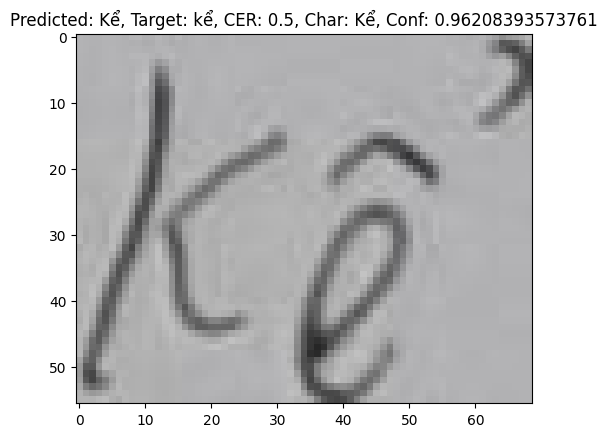

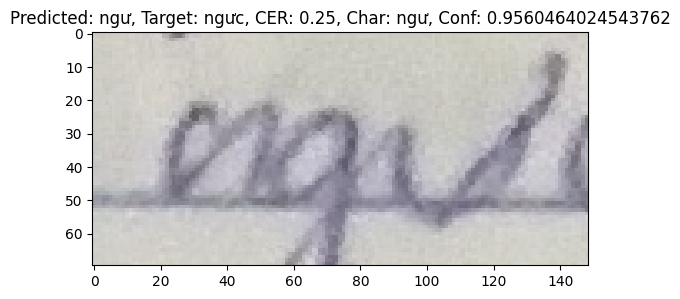

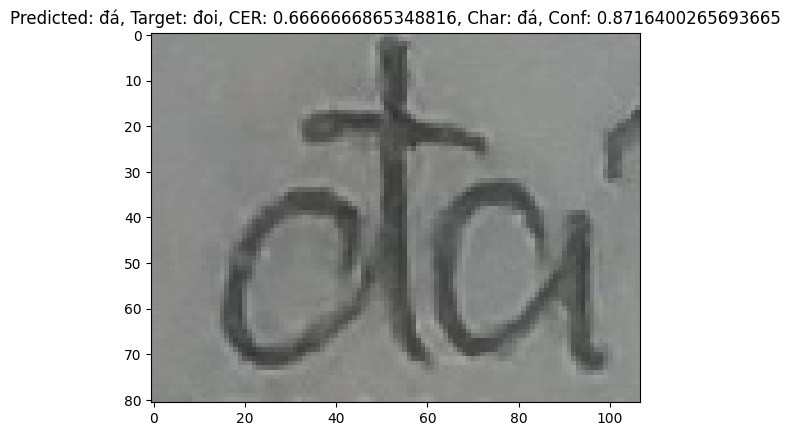

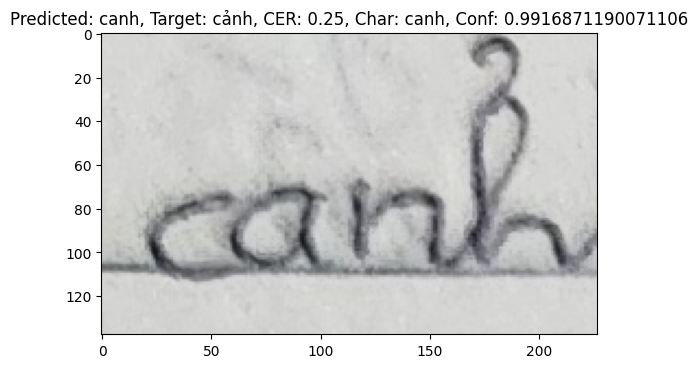

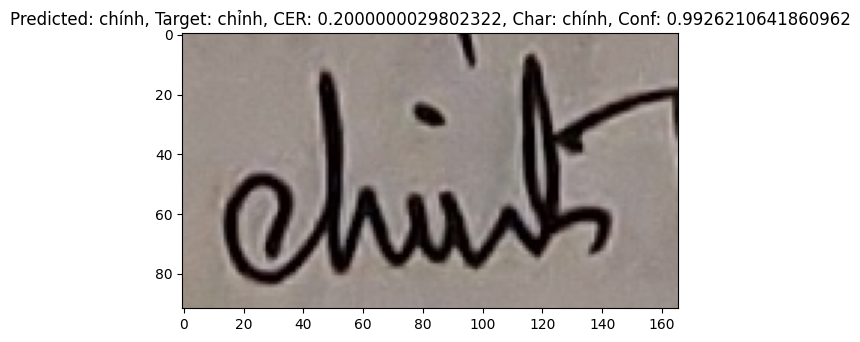

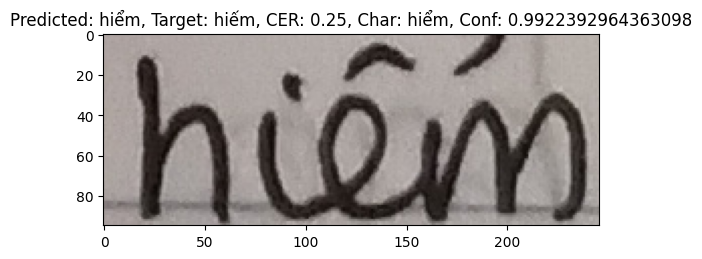

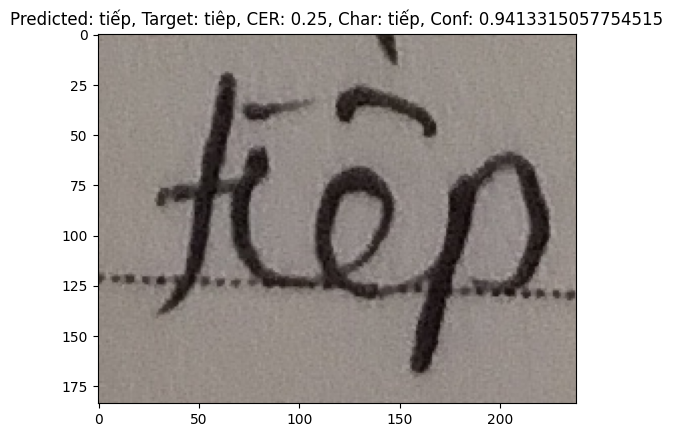

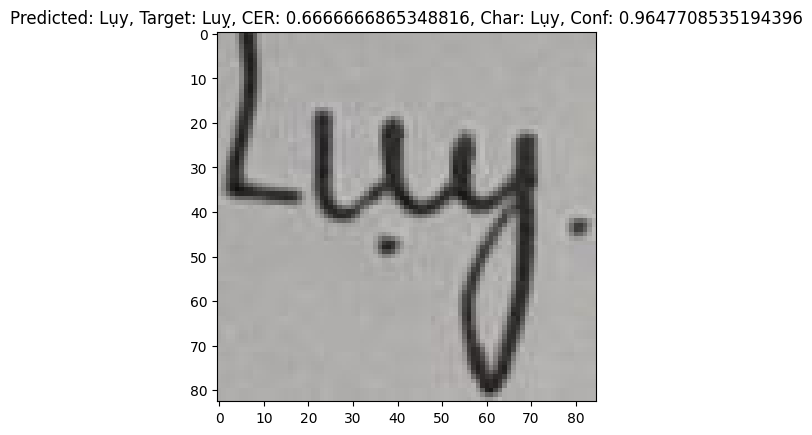

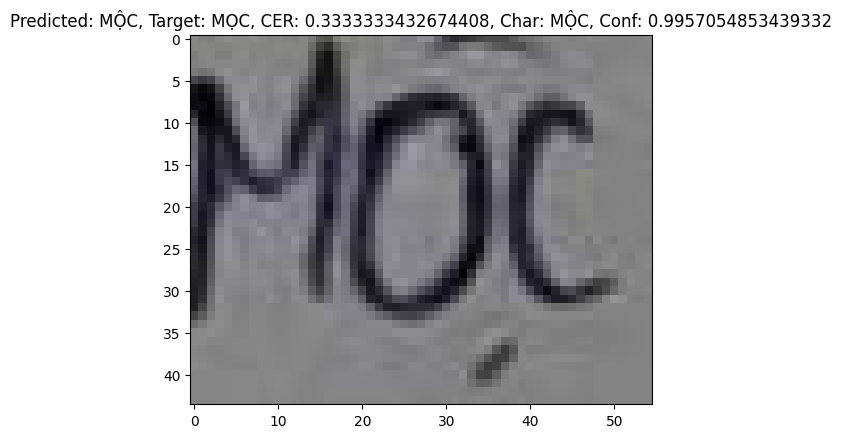

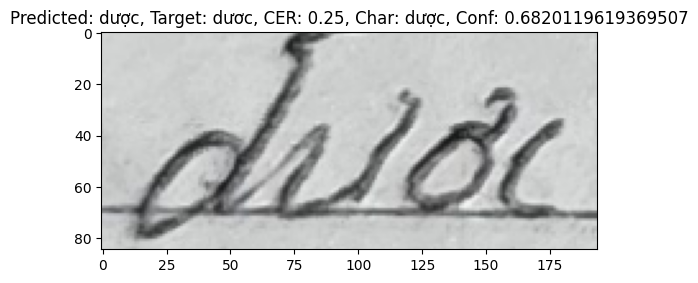

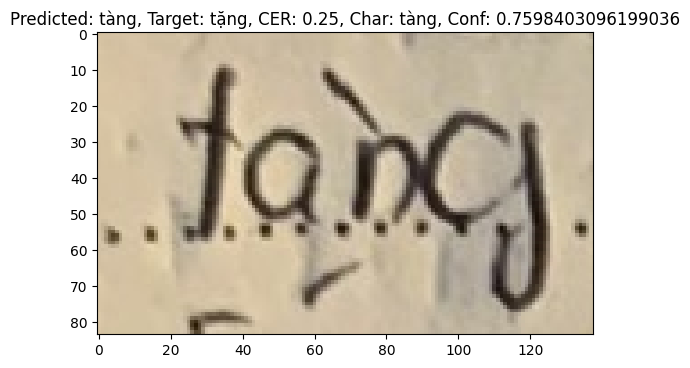

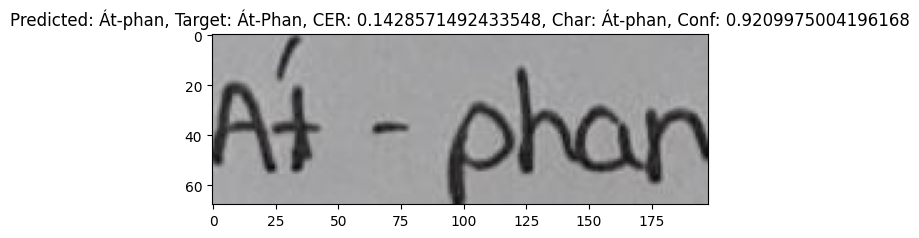

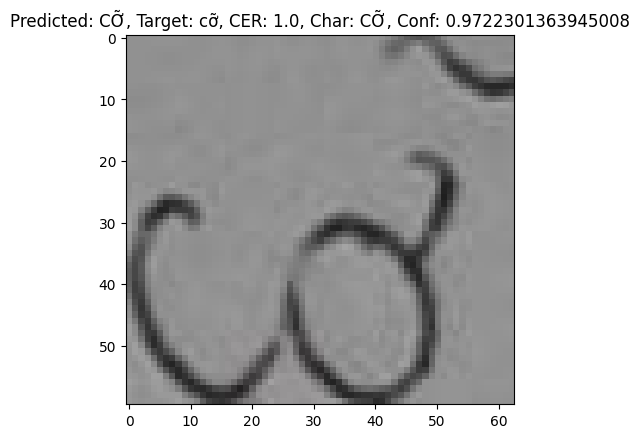

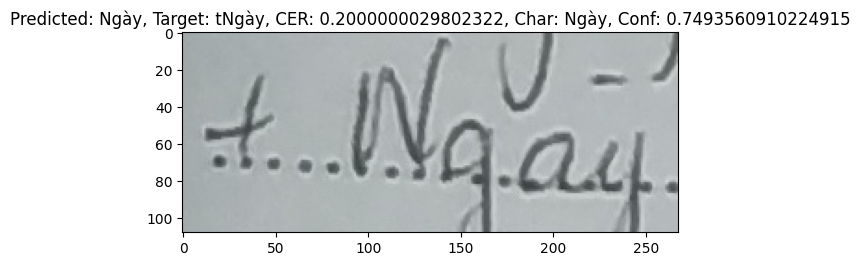

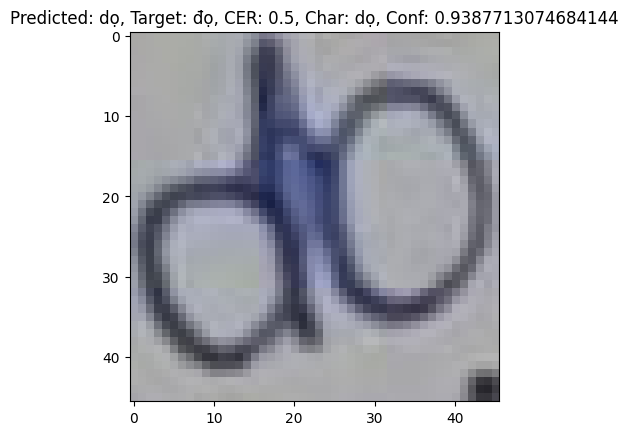

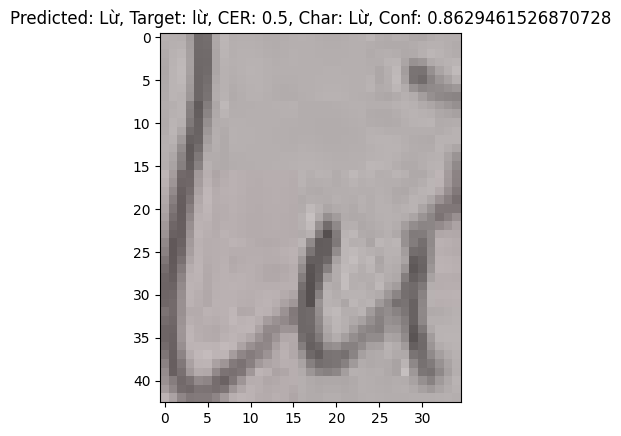

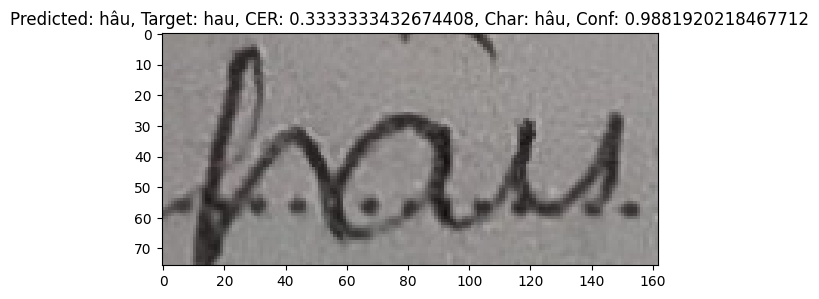

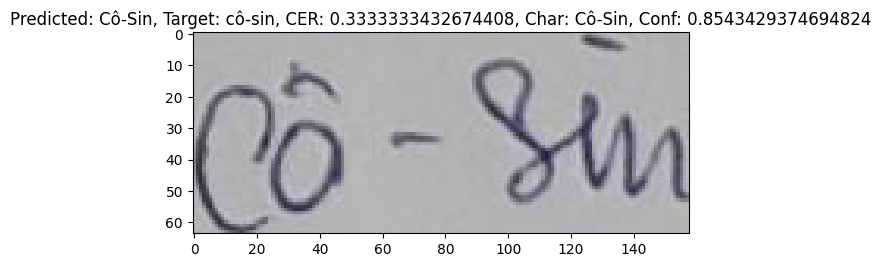

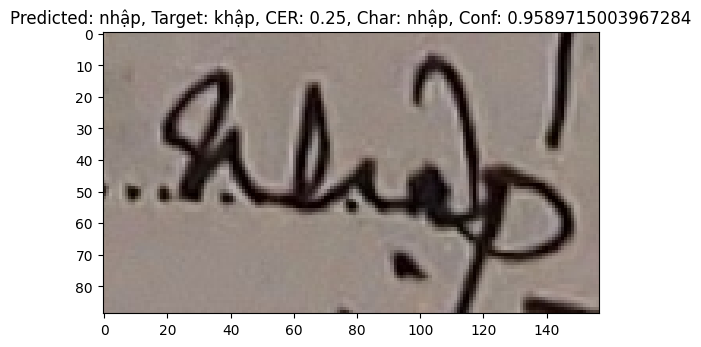

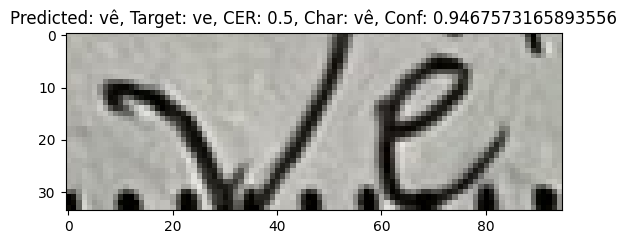

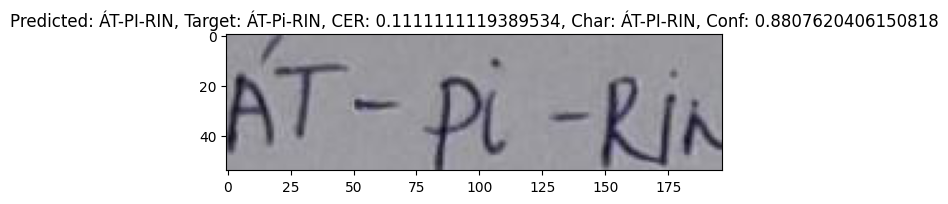

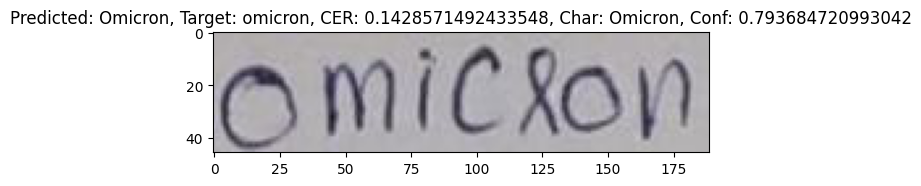

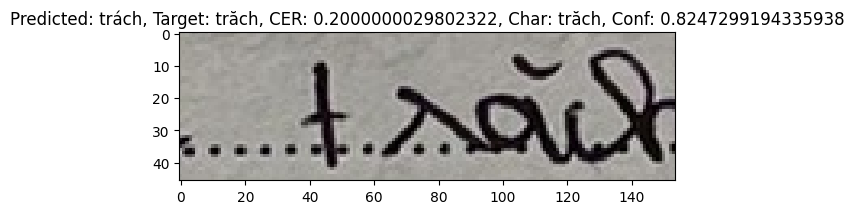

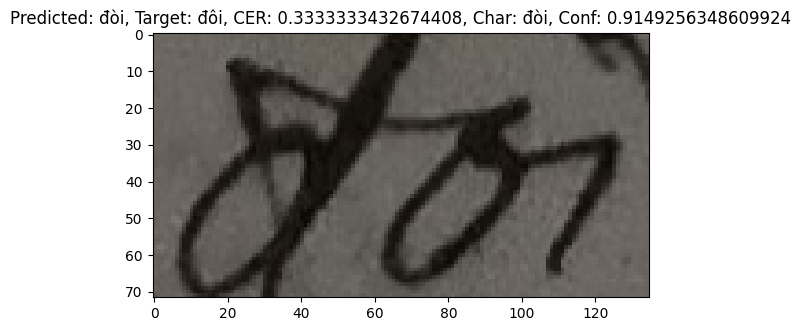

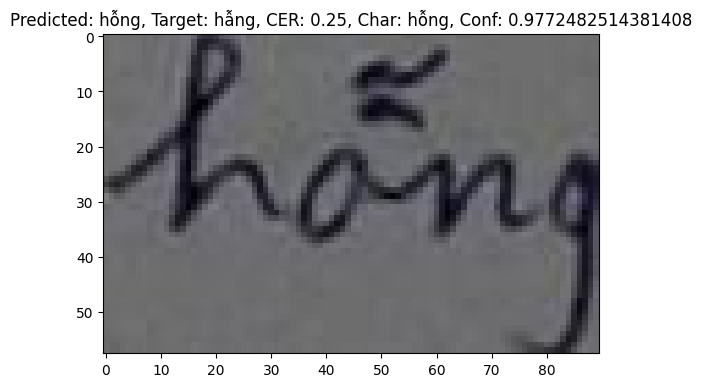

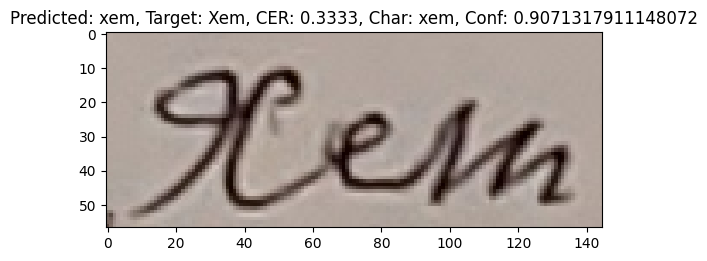

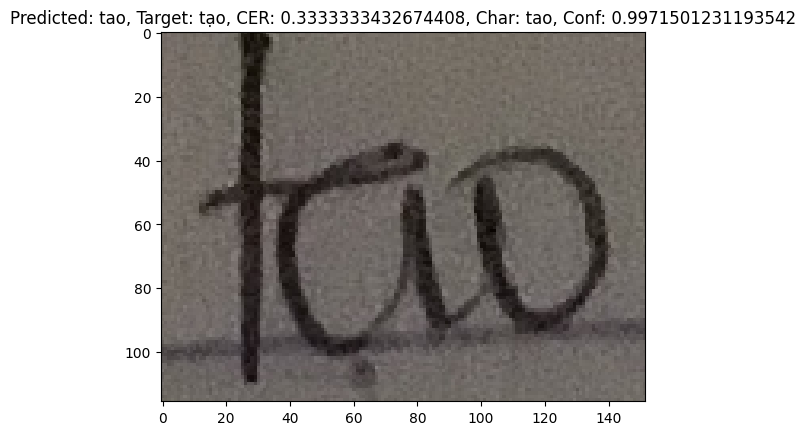

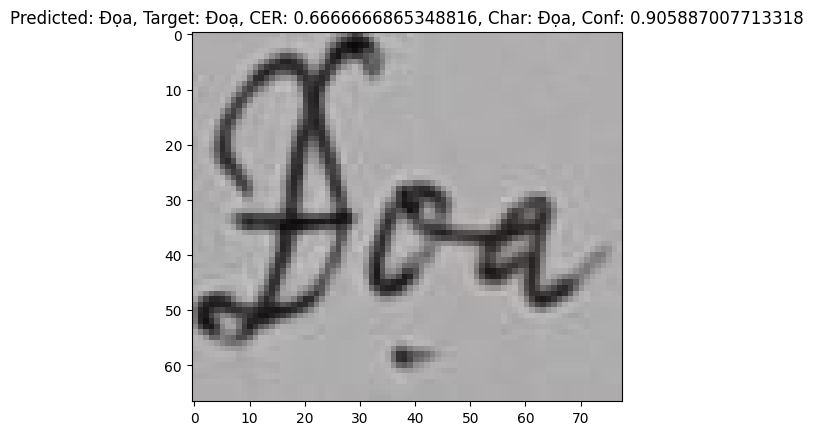

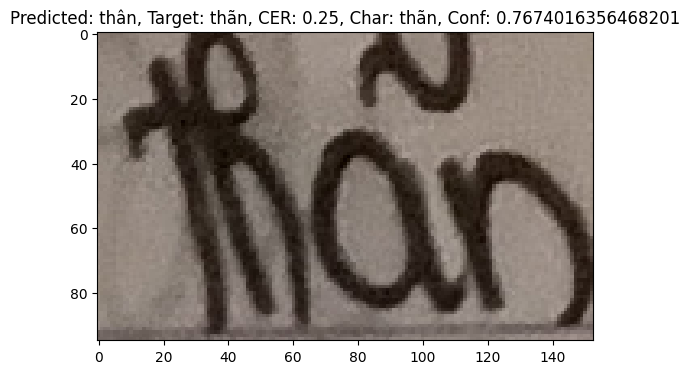

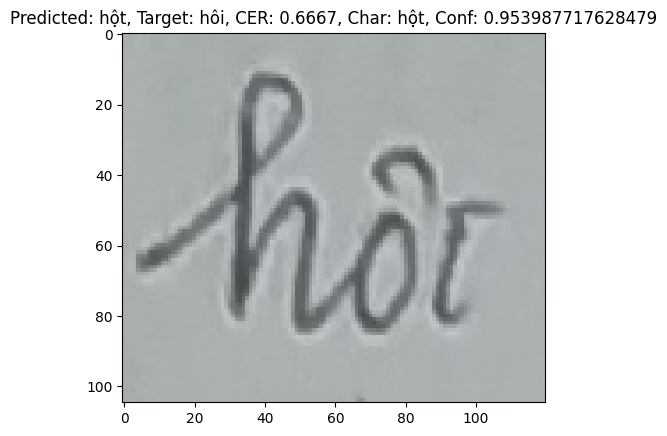

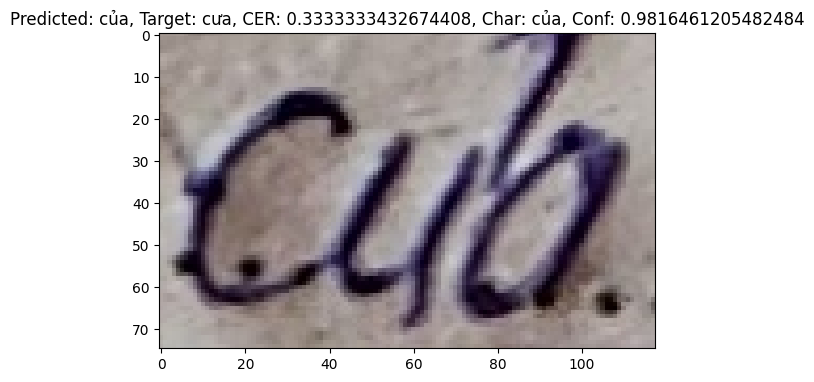

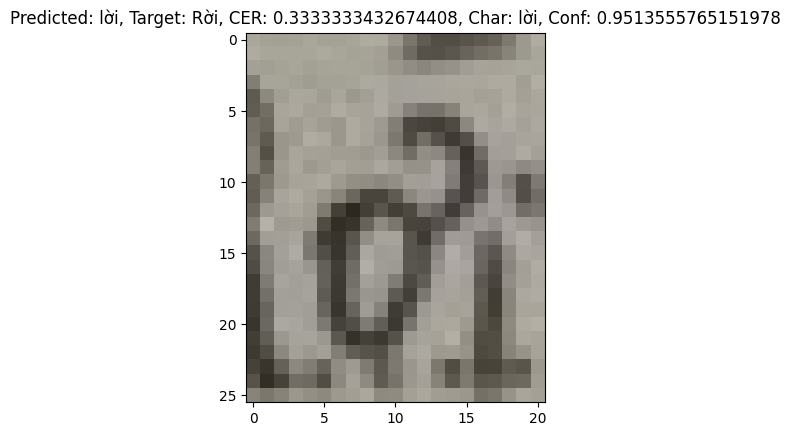

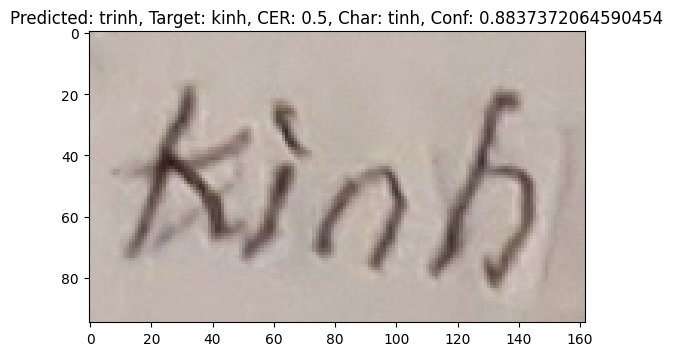

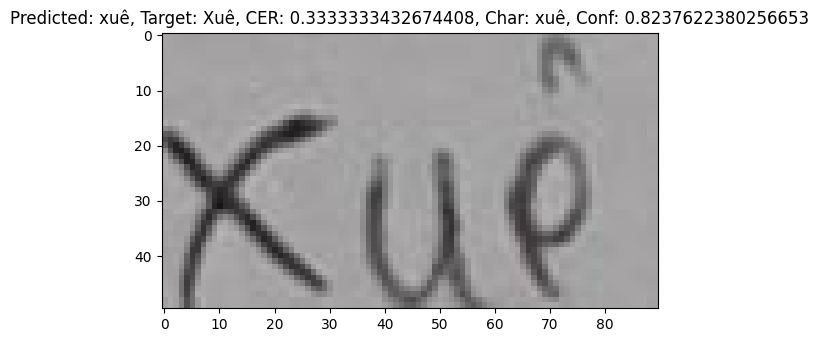

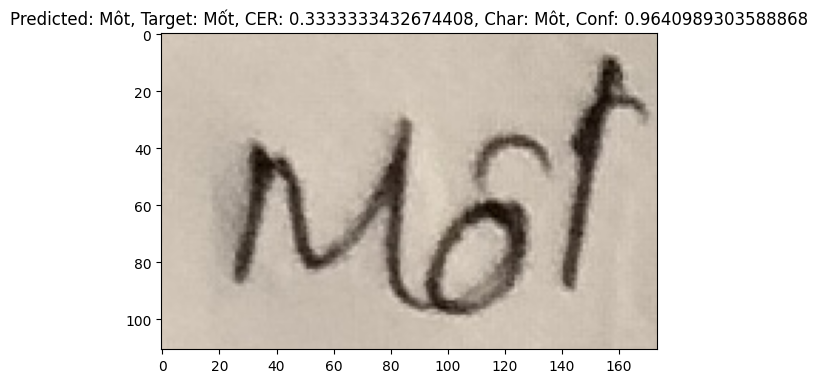

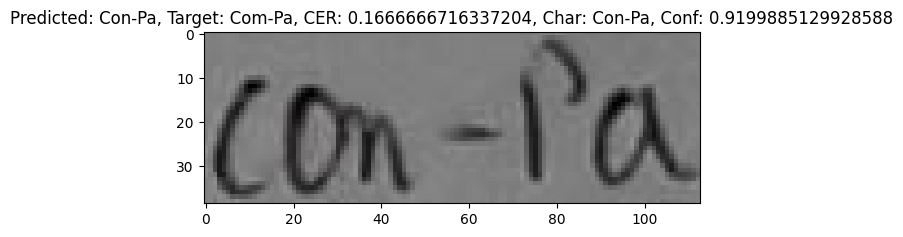

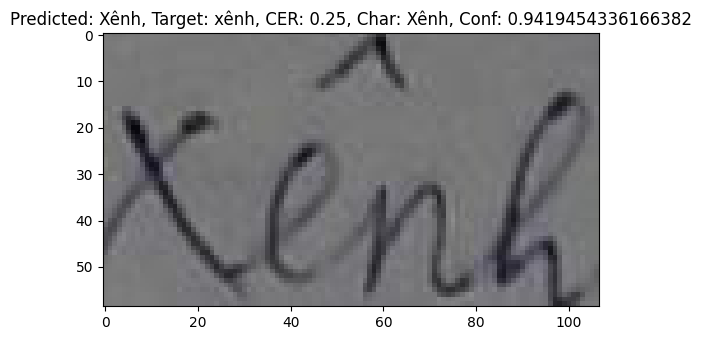

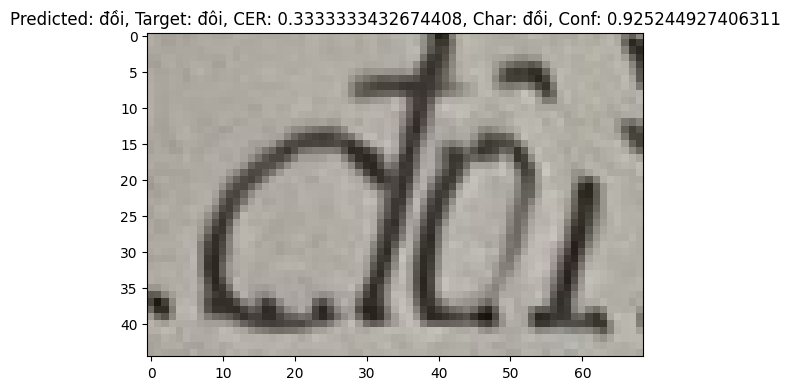

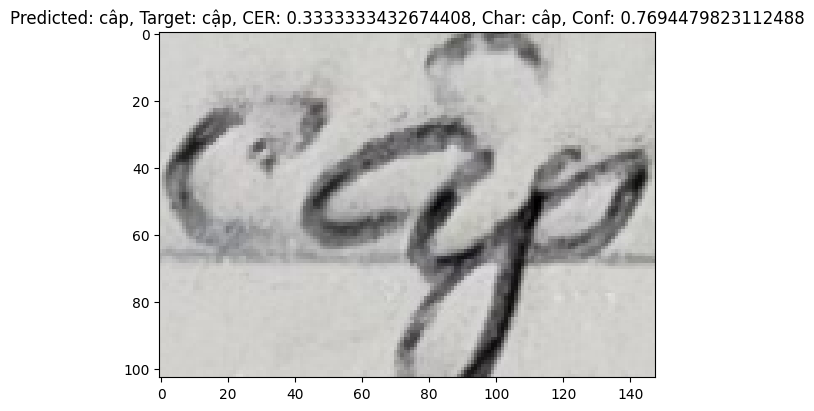

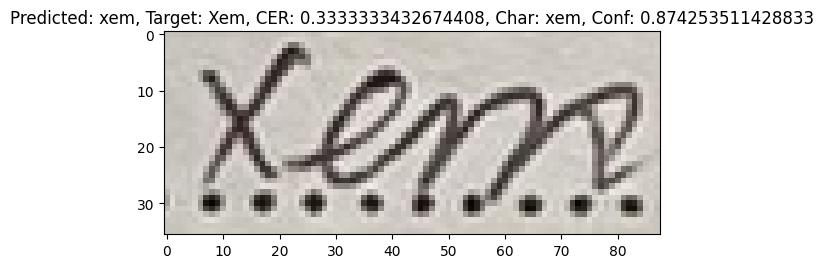

In [1]:
import numpy as np
import pandas as pd
import torch
import pytorch_lightning as pl
import pickle
import matplotlib.pyplot as plt
from PIL import Image

from torchmetrics.text import CharErrorRate
from ensemble import *
from config import LABEL_FILE

%matplotlib inline

val_inds = pickle.load(open('val_inds.pkl', 'rb'))


ensemble_val = pd.read_csv('ensemble/ensemble_val.csv', na_filter=False, encoding='utf-8')
preds = ensemble_val['pred']
reals = ensemble_val['real']
cer_scores = ensemble_val['cer']
char_preds = ensemble_val['pred_char']
conf_preds = ensemble_val['conf']

# Top 100 false predictions
false_predict_idx = np.where(np.array(cer_scores) > 0)[0]
false_cer_lst = [cer_scores[i] for i in false_predict_idx]

# Random sample 100 false predictions
# max_idx = np.argsort(false_cer_lst)[::-1][:100]
max_idx = np.random.choice(len(false_predict_idx), 100, replace=False)
top100_idx = false_predict_idx[max_idx]
# np.random.choice(false_predict_idx, 100, replace=False)

# Plot false predictions
for i in range(100):
    # conf = confidences.max(axis=1)[top100_idx[i]]
    data_idx = val_inds[top100_idx[i]]
    try:
        img = Image.open(f'./data/new_train/train_img_{data_idx}.png')
    except:
        img = Image.open(f'./data/new_train/train_img_{data_idx}.jpg')
    prediction = preds[top100_idx[i]]
    real = reals[top100_idx[i]]
    cer = cer_scores[top100_idx[i]]
    conf = conf_preds[top100_idx[i]]
    char_pred = char_preds[top100_idx[i]]
    plt.imshow(img)
    plt.title(f'Predicted: {prediction}, Target: {real}, CER: {cer}, Char: {char_pred}, Conf: {conf}')
    plt.show()